<div style="background-color:#80ced6">
<br>
<p style="text-align: center; font-size:28px; font-family: 'Times New Roman'">
COSC 4409 Big Data Technologies<br><br>
Project #1<br></p>
<p style="text-align: center; font-size:20px; font-family: 'Times New Roman'">
Due date: Monday, 04/20/2019</p>
<br>
</div>


Datasets: `youtube_trending.csv` and `category.json` <br><br>
</p>

<p style="font-size:16px">
This dataset includes several months of data on daily trending YouTube videos. Data includes the video_id, video title, trending date, channel title, category_id, publish time, tags, views, likes and dislikes, comment count, thumbnail_link, comment_disabled, ratinngs_disabled, video_error_or_removed, and description. Find the category name using category_id in `category.json file`.
</p>

### Import libraries

In [231]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import json

### Import dataset

In [232]:
youtube_vids = pd.read_csv('youtube_trending.csv', sep=',')
youtube_vids.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

### Explore your data
<p style="font-size:16px">
What are the columns? how many rows? any null values? data transform and wrangling needed?
</p>

In [233]:
# Dropping unnecessary columns
#youtube_vids = youtube_vids.drop(['comments_disabled','ratings_disabled','description','tags', 'thumbnail_link', 'video_error_or_removed'], axis= 1)


# Number of columns in our dataset.  
print("Number of Total columns: ",youtube_vids.shape[1]) # [1] is for columns
# Number of rows in our dataset.
print("Number of Total Entries: ",youtube_vids.shape[0]) # [0] is for rows
# Number of duplicated videos
print("Number of Duplicated Videos: " ,youtube_vids.video_id.duplicated().sum())
# Number of unique values for video_id column
print("Number of Unique Videos: ",youtube_vids.video_id.nunique())

Number of Total columns:  16
Number of Total Entries:  40949
Number of Duplicated Videos:  34598
Number of Unique Videos:  6351


In [234]:
youtube_vids.reset_index(drop=True, inplace = True)
youtube_vids

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


<p style="font-size:24px">
Answer the following questions:
</p>

### 1. How many distinct videos?

In [235]:
# Number of distinct videos
distinct_vid = youtube_vids.video_id.nunique()
print ("Number of Distinct Videos: ", distinct_vid)

Number of Distinct Videos:  6351


In [236]:
# Videos with errors or removed videos
youtube_vids[youtube_vids.video_error_or_removed == True].video_id.count()
youtube_vids[youtube_vids.video_error_or_removed == True].index
youtube_vids[youtube_vids.video_error_or_removed == True]
# Dropping the 23 error or removed videos
youtube_vids.drop(youtube_vids[youtube_vids.video_error_or_removed == True].index, axis = 0, inplace = True)

print ("New Total of entries: ", len(youtube_vids))

New Total of entries:  40926


### 2. Find the 5 most likes video related to Robotics. Use subplots to compare their number of views, dislikes, and comments.

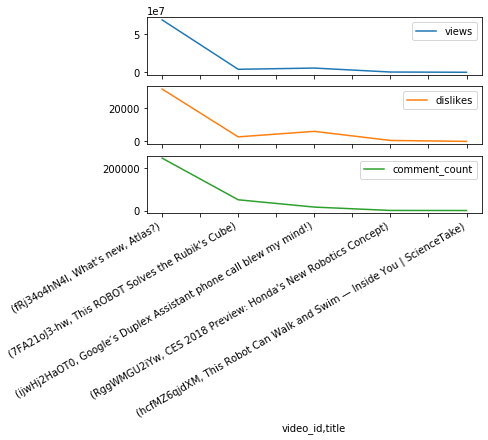

In [237]:
unique_df = youtube_vids[youtube_vids['tags'].str.contains('Robotics', case=False)].groupby(['video_id','title'])[['likes', 'views', 'dislikes', 'comment_count']].sum()
top_5 = unique_df.nlargest(5, 'likes')
cols = ['views','dislikes','comment_count']
top_5[cols].plot(kind='line',subplots=True)
plt.show()


### 3. What is the mean views, likes, dislikes, and comment_count per (distinct) video

In [238]:
unique5_mean = youtube_vids[youtube_vids['tags'].str.contains('Robotics', case=False)].groupby(['video_id','title'])[['likes', 'views', 'dislikes', 'comment_count']].mean()
unique5_mean.likes = unique5_mean.likes.astype('int64')
unique5_mean.views = unique5_mean.views.astype('int64')
unique5_mean.dislikes = unique5_mean.dislikes.astype('int64')
unique5_mean.comment_count = unique5_mean.comment_count.astype('int64')
top_5_mean = unique5_mean.nlargest(5, 'likes')
top_5_mean

,,likes,views,dislikes,comment_count
video_id,title,,,,
fRj34o4hN4I,"What's new, Atlas?",174352,8462442,3919,30602
7FA21oJ3-hw,This ROBOT Solves the Rubik's Cube,11767,298309,211,3866
ijwHj2HaOT0,Google’s Duplex Assistant phone call blew my mind!,8470,496963,548,1468
hcfMZ6qjdXM,This Robot Can Walk and Swim — Inside You | ScienceTake,369,11556,11,52
RggWMGU2iYw,CES 2018 Preview: Honda's New Robotics Concept,313,57871,100,72


### 4. Add a column `category_name` to the DataFrame imported from `youtube_trending.csv`. 
**Note:** The category name stored at items -> snipped -> title in the `category_id.json` file

In [239]:
youtube_vids['category_id'] = youtube_vids['category_id'].astype(str)

category_id = {}

with open('category.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        category_id[category['id']] = category['snippet']['title']
youtube_vids.insert(5, 'category_name', youtube_vids['category_id'].map(category_id))
youtube_vids.head(5)

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### 5. Which channels have the largest number of trending videos?
<br><font face="Times New Roman" size='4'>Draw a bar graph: (Number of videos) X (Channel)</font>

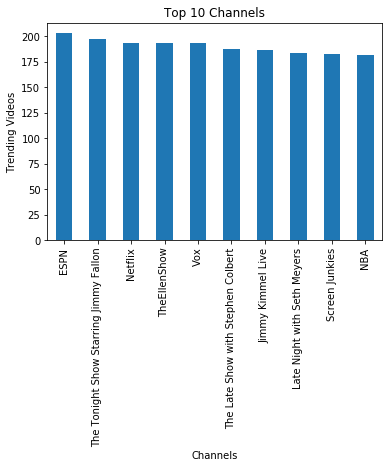

In [240]:
youtube_vids.columns
df1 = pd.DataFrame(youtube_vids.channel_title.value_counts())
df2 = df1.nlargest(10, df1)
df2.plot.bar(legend=False)
plt.ylabel('Trending Videos')
plt.xlabel('Channels')
plt.title('Top 10 Channels')
plt.show()

### 6. Which video category has the largest number of trending videos?
<br><font face="Times New Roman" size='4'>Draw a bar graph: (Number of videos) X (Category)</font>

Text(0.5, 0, 'Category')

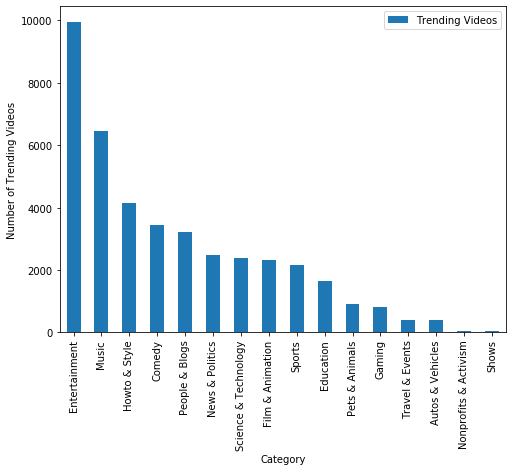

In [241]:
cdf = youtube_vids["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "Trending Videos"}, inplace=True)
cdf.plot.bar(x="category_name", y="Trending Videos",figsize=(8,6))
plt.ylabel('Number of Trending Videos')
plt.xlabel('Category')

### 7. Which day of the week had the most trending videos?
<br><font face="Times New Roman" size='4'>Draw a bar graph: (Number of videos) X (Day of the week)</font>

In [242]:
youtube_vids = pd.read_csv('youtube_trending.csv', sep=',')
youtube_vids.columns
youtube_vids[['trending_date', 'publish_time']].head()

,trending_date,publish_time
0,17.14.11,2017-11-13T17:13:01.000Z
1,17.14.11,2017-11-13T07:30:00.000Z
2,17.14.11,2017-11-12T19:05:24.000Z
3,17.14.11,2017-11-13T11:00:04.000Z
4,17.14.11,2017-11-12T18:01:41.000Z


In [243]:
youtube_vids['trending_date'] = pd.to_datetime(youtube_vids['trending_date'], format='%y.%d.%m')
youtube_vids['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [244]:
youtube_vids['publish_time'] = pd.to_datetime(youtube_vids['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
youtube_vids['publish_time'].head()

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [245]:
youtube_vids.insert(3, 'publish_date', youtube_vids['publish_time'].dt.date)
youtube_vids['publish_time'] = youtube_vids['publish_time'].dt.time

In [246]:
youtube_vids[['publish_date', 'publish_time','trending_date']].head()

,publish_date,publish_time,trending_date
0,2017-11-13,17:13:01,2017-11-14
1,2017-11-13,07:30:00,2017-11-14
2,2017-11-12,19:05:24,2017-11-14
3,2017-11-13,11:00:04,2017-11-14
4,2017-11-12,18:01:41,2017-11-14


Text(0.5, 1.0, 'Most Trending Video by Day')

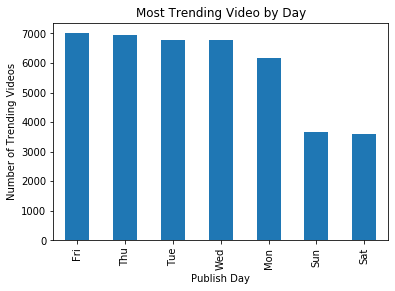

In [247]:
A = youtube_vids['publish_date'].apply(lambda x: x.strftime('%a')).value_counts()
A.plot.bar()
plt.ylabel('Number of Trending Videos')
plt.xlabel('Publish Day')
plt.title('Most Trending Video by Day')

### 8. What's the best time of the day to publish a video?
<br><font face="Times New Roman" size='4'>Draw a bar graph: (Number of videos) X (Hour of the day)</font>

In [248]:
#keep only hour of publish_time into a new column called newpublish_time
youtube_vids['newpublish_time'] = list(map(lambda x : str(youtube_vids['publish_time'][x])[:2], range(len(youtube_vids['publish_time']))))

Text(0.5, 1.0, 'Best Time of Day to Publish')

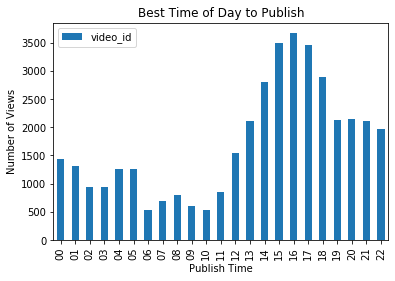

In [249]:
#calculate views by number of videos
grp1 = youtube_vids.groupby(['newpublish_time'])['video_id'].count()
grp1
df_videobytime = pd.DataFrame(grp1)
df_videobytime = df_videobytime[:-1]#get rid of na
#print(df_videobytime)
df_videobytime.plot.bar()
plt.ylabel('Number of Views')
plt.xlabel('Publish Time')
plt.title('Best Time of Day to Publish')

### 9. Top ten most used tags

In [250]:
# split() returns list of all the words in the string 
tags10 = list(youtube_vids["tags"].apply(lambda x: x.split()))
tags10 = [x for y in tags10 for x in y]
print ("Top 10 Most Used Tags: ""\n""\n""  Word & Uses: ")
Counter(tags10).most_common(10)

Top 10 Most Used Tags: 

  Word & Uses: 


[('the', 7800),
 ('to', 6878),
 ('and', 6189),
 ('of', 6008),
 ('a', 4347),
 ('in', 3068),
 ('with', 2304),
 ('on', 2173),
 ('vs', 2089),
 ('for', 1913)]

### Just for Fun
### Create a word cloud for tag and title
**Note:** install `wordcloud`<br>
`pip install wordcloud`

In [132]:
from wordcloud import STOPWORDS,WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [133]:
tags = youtube_vids['tags']
plt.figure(figsize = (13,14))
wc = WordCloud(background_color = 'black', max_words = 1000, stopwords = STOPWORDS, max_font_size = 50)    
wc.generate(' '.join(tags))
plt.imshow(wc)
plt.axis('off') 

NameError: name 'us_videos' is not defined

In [134]:
title_words = list(youtube_vids["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]

wc = WordCloud(width=1000, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

NameError: name 'us_videos' is not defined

### 10. Draw a 2x2 scatter charts showing likes, dislikes (Y-axis) X views , comments (X-axis)
#### Give conclusions from the charts

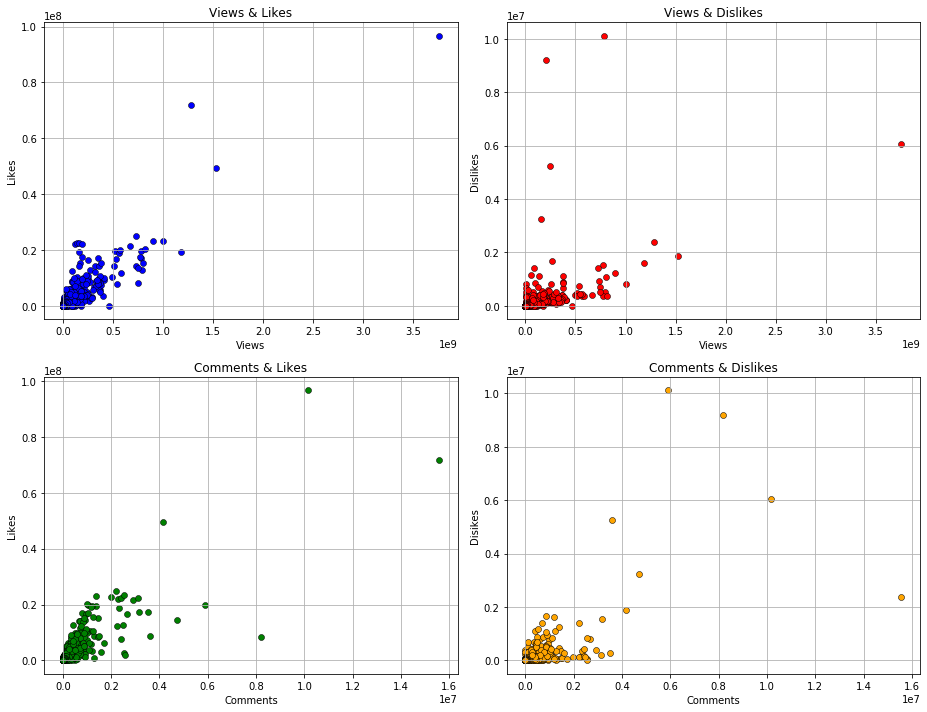

In [294]:
# plot the graph
df_sort = youtube_vids.groupby("video_id").sum() # sorted unique values
df_sort

# Create and display the first scatter plot
fig = plt.figure(figsize = (13,10))


#1
ax1 = fig.add_subplot(2,2,1) 
plt.scatter(x=df_sort['views'], y=df_sort['likes'], color='blue', edgecolors="#000000", linewidths=0.5)
ax1.set(xlabel="Views", ylabel="Likes");
ax1.set_title("Views & Likes")
ax1.grid()

#2
ax2 = fig.add_subplot(2,2,2)
plt.scatter(x=df_sort['views'], y=df_sort['dislikes'], color='red', edgecolors="#000000", linewidths=0.5)
ax2.set(xlabel="Views", ylabel="Dislikes");
ax2.set_title("Views & Dislikes")
ax2.grid()

#3
ax3 = fig.add_subplot(2,2,3)
plt.scatter(x=df_sort['comment_count'], y=df_sort['likes'], color='green', edgecolors="#000000", linewidths=0.5)
ax3.set(xlabel="Comments", ylabel="Likes");
ax3.set_title("Comments & Likes")
ax3.grid()

#4
ax4 = fig.add_subplot(2,2,4)
plt.scatter(x=df_sort['comment_count'], y=df_sort['dislikes'], color='orange', edgecolors="#000000", linewidths=0.5)
ax4.set(xlabel="Comments", ylabel="Disikes");
ax4.set_title("Comments & Dislikes")
ax4.grid()

plt.tight_layout()
plt.show()

In [ ]:
# By looking at the plots, we can see that both likes and dislikes share a moderate positive linear correllation with the
# number of views and comments per video.


### 11. Your question(s)